# Homework Assignment Python APIs. 
# WeatherPy


# DESCRIPTION OF OBSERVABLE TRENDS

* The temperature increases as you approch the equator. the Northern hemisphere is cooler than the Southern at this moment.  
* no strong relationship can be found between latitude and wind speed, but in many countries the wind speed is below 10 mph at this time
* no strong relationship can be found between latitude and cloudiness,but a large number of cities have a cloudless sky
* no very strong relationship can be found between latitude and humidiy, but you see that in the Northerm hemisphere there are a large numberof cities with a humidity around 80% or higher



In [22]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import random
import json
import pytemperature
import datetime

# Import API key
import api_keys
api_key = api_keys.api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [23]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

600

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [24]:
Columnnames = ["City", "Country", "Temperature (F)", "Latitude", "Longitude", "Humidity (%)", "Cloudiness (%)", "Wind Speed (mph)"]

Selected_Cities_df = pd.DataFrame(columns=Columnnames)

Selected_Cities_df.head

print("Beginning Data Retrieval \n---------------------------------")
for i in range(len(cities)): 
    print("Processing Record " + str(i) + " | " + cities[i])
    url = "http://api.openweathermap.org/data/2.5/weather?units=imperial&q="
    combi_url = url + str(cities[i])+str("&appid=" + api_key)
    response = requests.get(combi_url)
    if response.status_code == 404:
        print("City not found, Skipping...")
    else:
        data = response.json()
        Selected_Cities_df = Selected_Cities_df.append({'City':data["name"],
                                                    'Country':data["sys"]['country'], 
                                                    'Temperature (F)':data["main"]["temp"],
                                                    'Latitude':data["coord"]["lat"],
                                                    'Longitude':data["coord"]["lon"],
                                                    'Humidity (%)':data["main"]["humidity"],
                                                    'Cloudiness (%)':data["clouds"]["all"],
                                                    'Wind Speed (mph)':data["wind"]["speed"]},
                                                    ignore_index=True)
    
print("------------------------------------\nData Retrieval Complete")   

Beginning Data Retrieval 
---------------------------------
Processing Record 0 | taolanaro
City not found, Skipping...
Processing Record 1 | saldanha
Processing Record 2 | puerto ayora
Processing Record 3 | rikitea
Processing Record 4 | nome
Processing Record 5 | hilo
Processing Record 6 | mahebourg
Processing Record 7 | georgetown
Processing Record 8 | ancud
Processing Record 9 | saint-philippe
Processing Record 10 | nikolskoye
Processing Record 11 | arraial do cabo
Processing Record 12 | kodiak
Processing Record 13 | mar del plata
Processing Record 14 | qaanaaq
Processing Record 15 | mys shmidta
City not found, Skipping...
Processing Record 16 | esperance
Processing Record 17 | san antonio
Processing Record 18 | kavieng
Processing Record 19 | fare
Processing Record 20 | anadyr
Processing Record 21 | ponta delgada
Processing Record 22 | bethel
Processing Record 23 | balaci
Processing Record 24 | albany
Processing Record 25 | bengkulu
City not found, Skipping...
Processing Record 26 |

Processing Record 224 | nguiu
City not found, Skipping...
Processing Record 225 | am timan
Processing Record 226 | umzimvubu
City not found, Skipping...
Processing Record 227 | hamilton
Processing Record 228 | provideniya
Processing Record 229 | san juan
Processing Record 230 | idanre
Processing Record 231 | montepuez
Processing Record 232 | myitkyina
Processing Record 233 | airai
Processing Record 234 | comodoro rivadavia
Processing Record 235 | goderich
Processing Record 236 | aklavik
Processing Record 237 | marabba
Processing Record 238 | chaozhou
Processing Record 239 | flinders
Processing Record 240 | lata
Processing Record 241 | toktogul
Processing Record 242 | chokurdakh
Processing Record 243 | freeport
Processing Record 244 | torbay
Processing Record 245 | santa marinella
Processing Record 246 | mmathubudukwane
Processing Record 247 | puerto ayacucho
Processing Record 248 | louisbourg
City not found, Skipping...
Processing Record 249 | natal
Processing Record 250 | burgeo
Proce

Processing Record 445 | palembang
Processing Record 446 | port-gentil
Processing Record 447 | noumea
Processing Record 448 | honningsvag
Processing Record 449 | beyneu
Processing Record 450 | namwala
Processing Record 451 | taltal
Processing Record 452 | usinsk
Processing Record 453 | sentyabrskiy
City not found, Skipping...
Processing Record 454 | christchurch
Processing Record 455 | kotelnikovo
Processing Record 456 | oranjemund
Processing Record 457 | olafsvik
City not found, Skipping...
Processing Record 458 | cap malheureux
Processing Record 459 | uk
City not found, Skipping...
Processing Record 460 | evanston
Processing Record 461 | asyut
Processing Record 462 | dali
Processing Record 463 | linxia
Processing Record 464 | ucluelet
Processing Record 465 | agirish
Processing Record 466 | jacmel
Processing Record 467 | la libertad
Processing Record 468 | dalby
Processing Record 469 | kibuye
Processing Record 470 | lagoa
Processing Record 471 | guarda
Processing Record 472 | tura
Proc

In [25]:
Selected_Cities_df.count()

City                529
Country             529
Temperature (F)     529
Latitude            529
Longitude           529
Humidity (%)        529
Cloudiness (%)      529
Wind Speed (mph)    529
dtype: int64

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [26]:
Selected_Cities_df.to_csv(output_data_file)

In [27]:
Selected_Cities_df

,City,Country,Temperature (F),Latitude,Longitude,Humidity (%),Cloudiness (%),Wind Speed (mph)
0,Saldanha,PT,27.74,41.42,-6.55,98,20,2.73
1,Puerto Ayora,EC,80.60,-0.74,-90.35,78,75,13.87
2,Rikitea,PF,80.39,-23.12,-134.97,99,20,12.46
3,Nome,US,67.68,30.04,-94.42,83,90,8.05
4,Hilo,US,78.98,19.71,-155.08,66,20,11.41
5,Mahebourg,MU,77.00,-20.41,57.70,88,20,3.36
6,Georgetown,GY,76.30,6.80,-58.16,94,40,6.93
7,Ancud,CL,66.20,-41.87,-73.83,59,0,6.93
8,Saint-Philippe,CA,15.53,45.36,-73.48,78,90,9.17
9,Nikolskoye,RU,6.80,59.70,30.79,84,0,4.47


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

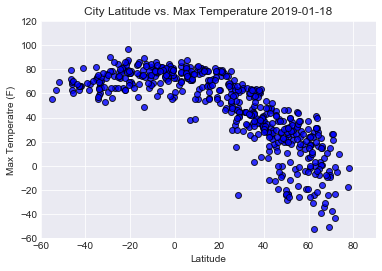

In [28]:
date_now = datetime.datetime.now().date()

plt.scatter(Selected_Cities_df["Latitude"],
           Selected_Cities_df["Temperature (F)"],
           edgecolor="black", linewidths=1, marker="o",
           facecolors="blue", alpha=0.8, label="City")
plt.style.use("seaborn-darkgrid")
plt.title(f"City Latitude vs. Max Temperature {date_now}")
plt.ylabel("Max Temperatre (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-60,90])
plt.ylim([-60,120])

plt.savefig("output_data/Latitude_Temperature.png")

plt.show()

#### Latitude vs. Humidity Plot

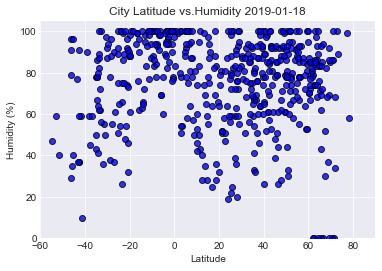

In [29]:
plt.scatter(Selected_Cities_df["Latitude"],
           Selected_Cities_df["Humidity (%)"],
           edgecolor="black", linewidths=1, marker="o",
           facecolors="blue", alpha=0.8, label="City")

plt.style.use('seaborn-darkgrid')
plt.title(f"City Latitude vs.Humidity {date_now}")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-60,90])
plt.ylim([0,105])

plt.savefig("output_data/Latitude_Humidity.png")

plt.show()

#### Latitude vs. Cloudiness Plot

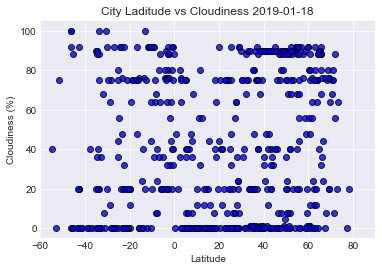

In [30]:
plt.scatter(Selected_Cities_df["Latitude"],
           Selected_Cities_df["Cloudiness (%)"],
           edgecolor="black", linewidths=1, marker="o",
           facecolors="blue", alpha=0.8, label="City")

plt.style.use('seaborn-darkgrid')
plt.title(f"City Laditude vs Cloudiness {date_now}")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-60,90])
plt.ylim([-5,105])

plt.savefig("output_data/Latitude_Cloudiness.png")

plt.show()

#### Latitude vs. Wind Speed Plot

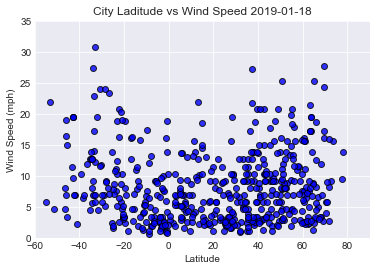

In [31]:
plt.scatter(Selected_Cities_df["Latitude"],
           Selected_Cities_df["Wind Speed (mph)"],
           edgecolor="black", linewidths=1, marker="o",
           facecolors="blue", alpha=0.8, label="City")

plt.style.use('seaborn-darkgrid')
plt.title(f"City Laditude vs Wind Speed {date_now}")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-60,90])
plt.ylim([0,35])

plt.savefig("output_data/Latitude_WindSpeed.png")

plt.show()